#  GRIP The Sparks Foundation
# Computer vision & IoT
# Task 4 : Face mask detection
# Name : Padmasandhiya P

### Model Inferencing with the trained Model

In [1]:
# load the required packages

from tensorflow import keras
from keras.preprocessing import image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load the model

model = keras.models.load_model("facemask_keras_model.h5")

### Testing with unseen data

(1, 224, 224, 3)


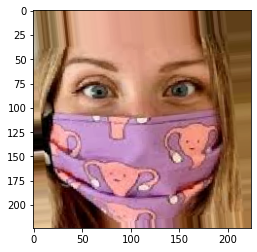

In [4]:
from keras.preprocessing import image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image_path="Face-Mask-Dataset\\Test\\WithMask\\Augmented_854_5503218.png"
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)

mask_img = np.expand_dims(img, axis=0)
mask = keras.applications.inception_v3.preprocess_input(mask_img,data_format='channels_last')
print(mask.shape)

In [5]:
predictions = model.predict(mask, verbose=1)
print(np.argmax(predictions))

1/1 [==============================] - 3s 3s/step
0


(1, 224, 224, 3)


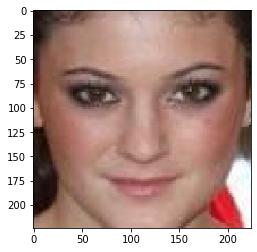

In [6]:
from keras.preprocessing import image

image_path="Face-Mask-Dataset\\Test\WithoutMask\\5306.png"
withoutmask_img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(withoutmask_img)

withoutmask_img = np.expand_dims(withoutmask_img, axis=0)
without_mask = keras.applications.inception_v3.preprocess_input(withoutmask_img,data_format='channels_last')
print(without_mask.shape)

In [7]:
predictions = model.predict(without_mask, verbose=1)
print(np.argmax(predictions))

1/1 [==============================] - 0s 31ms/step
1


### Face-Mask Live Detection

In [8]:
# packages for inferencing

import cv2
import numpy as np
import mediapipe as mp

In [9]:
mpfacedetection = mp.solutions.face_detection
detector = mpfacedetection.FaceDetection()
cap = cv2.VideoCapture(0)
while True:
    _,frame = cap.read()
    frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    face = detector.process(frame_rgb)
    if face.detections:  
        for index,detection in enumerate(face.detections):
            bounding_box = detection.location_data.relative_bounding_box
            height,width = frame.shape[:2]
            x ,y= int(bounding_box.xmin*width) ,int(bounding_box.ymin*height)
            w ,h = int(bounding_box.width*width) ,int(bounding_box.height*height)
            
            pred_frame = frame_rgb[y-30:y+h,x:x+w]
            
        try:
            pred_frame = cv2.resize(pred_frame,(224,224))
            pred_frame = pred_frame / 255.0
            pred_frame = pred_frame.reshape(1,224,224,3)

            predict = np.argmax(model.predict(pred_frame))
            if predict == 0:
                cv2.rectangle(frame,(x,y-30),(x+w,y+h),(0,255,0),4)
                cv2.putText(frame,"Mask",(x,y-40),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            else:
                cv2.rectangle(frame,(x,y-30),(x+w,y+h),(0,0,255),4)
                cv2.putText(frame,"NoMask",(x,y-40),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2) 
        except:
            pass
    cv2.imshow("Face Mask",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()